In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("./Daily+temperature+data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['Date', 'Temperature']
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         730 non-null    datetime64[ns]
 1   Temperature  730 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


(730, 2)

In [6]:
df = df.set_index('Date')
df.head(20)

,Temperature
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5
2017-01-06,9.5
2017-01-07,12.2
2017-01-08,15.7
2017-01-09,16.3


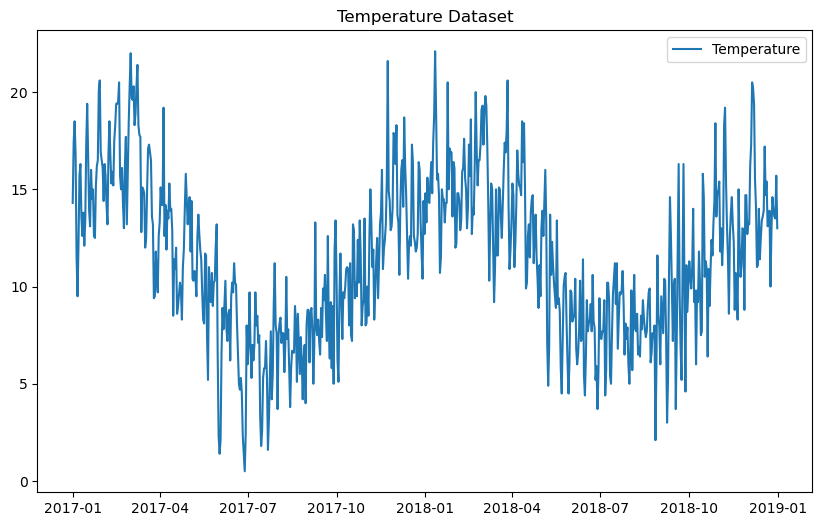

In [7]:
plt.figure(figsize=[10,6])
plt.plot(df['Temperature'], label='Temperature')
plt.legend(loc='best')
plt.title('Temperature Dataset')
plt.show()

In [8]:
math.ceil(df.shape[0]*.7)

511

In [9]:
train_len = 511
train = df[:train_len]
test = df[train_len:]

In [10]:
test.tail(20)

,Temperature
Date,
2018-12-12,14.0
2018-12-13,11.4
2018-12-14,12.5
2018-12-15,13.4
2018-12-16,13.6
2018-12-17,13.9
2018-12-18,17.2
2018-12-19,14.7
2018-12-20,15.4


In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [12]:
model = SimpleExpSmoothing(train['Temperature'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(test.shape[0])

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 14.3, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


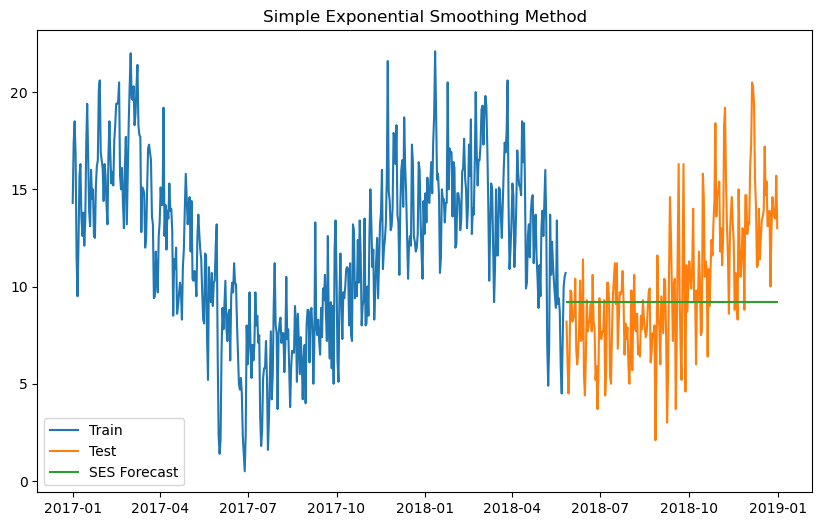

In [13]:
plt.figure(figsize=[10,6])
plt.plot(train['Temperature'],label='Train')
plt.plot(test['Temperature'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
rmse = np.sqrt(mean_squared_error(test['Temperature'], y_hat_ses['ses_forecast'])).round(2)
mape = (np.mean(np.abs(test['Temperature']-y_hat_ses['ses_forecast'])/test['Temperature'])*100).round(2)

results = pd.DataFrame({
    'Method' : ['SimpleExpSmoothing'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results

,Method,RMSE,MAPE
0,SimpleExpSmoothing,3.56,30.24


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### Holt's Exponential Forecasting Method

In [35]:
model = ExponentialSmoothing(np.asarray(train['Temperature']), trend='add', seasonal_periods=300)
model_fit = model.fit(smoothing_level=0.1, smoothing_trend=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(test.shape[0])

{'smoothing_level': 0.1, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 16.039999999999992, 'initial_trend': -0.26545454545454444, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


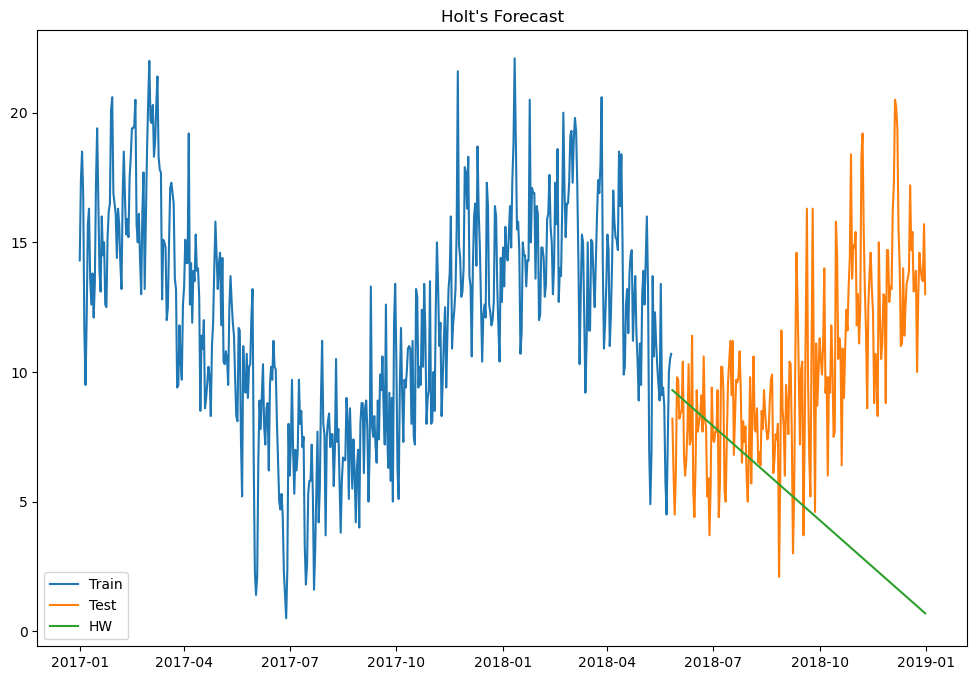

In [36]:
plt.figure(figsize=[12,8])
plt.plot(train['Temperature'], label='Train')
plt.plot(test['Temperature'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='HW')
plt.legend(loc='best')
plt.title("Holt\'s Forecast")
plt.show()

In [22]:
rmse = np.sqrt(mean_squared_error(test['Temperature'], y_hat_holt['holt_forecast'])).round(2)
mape = (np.mean(np.abs(test['Temperature']-y_hat_holt['holt_forecast'])/test['Temperature'])*100).round(2)

results = pd.DataFrame({
    'Method' : ['SimpleExpSmoothing'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results

,Method,RMSE,MAPE
0,SimpleExpSmoothing,5.95,41.94


#### Holt Winter's Additive Method with Trend & Seasonality

In [37]:
model = ExponentialSmoothing(np.asarray(train['Temperature']), trend='add', seasonal='add', seasonal_periods=30)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(test.shape[0])

{'smoothing_level': 0.6742905531408826, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 14.940153469593199, 'initial_trend': -0.009875626133881025, 'initial_seasons': array([ 0.52726187,  0.03275887,  0.0546689 ,  0.56433055,  0.03900888,
       -0.13932503, -0.02944389,  0.62153047,  0.77264519,  0.45323589,
        0.53353392,  0.27878707, -0.71724563,  0.23388172,  0.43173867,
        0.4594823 , -0.58961221,  0.22015795, -0.0816295 , -0.76005189,
       -0.53853719,  0.29500932, -0.87756244, -1.57357523, -0.71076678,
       -0.70671762, -0.43816353,  0.17757992,  0.69326927,  0.70914971]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


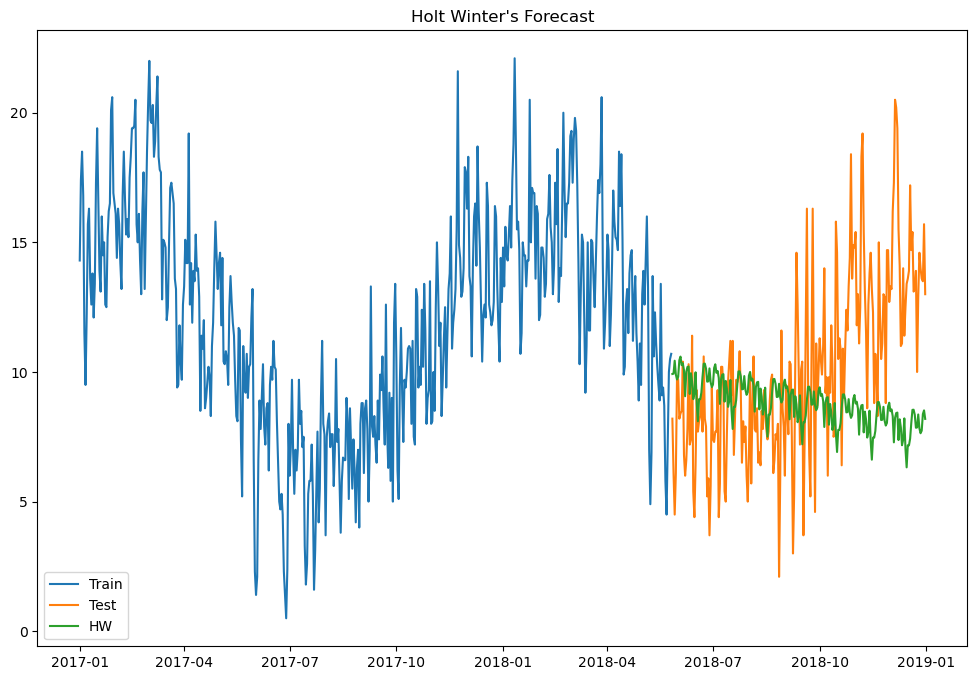

In [38]:
plt.figure(figsize=[12,8])
plt.plot(train['Temperature'], label='Train')
plt.plot(test['Temperature'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='HW')
plt.legend(loc='best')
plt.title("Holt Winter\'s Forecast")
plt.show()

In [39]:
rmse = np.sqrt(mean_squared_error(test['Temperature'], y_hat_hwa['hwa_forecast'])).round(2)
mape = (np.mean(np.abs(test['Temperature']-y_hat_hwa['hwa_forecast'])/test['Temperature'])*100).round(2)

results = pd.DataFrame({
    'Method' : ['SimpleExpSmoothing'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results

,Method,RMSE,MAPE
0,SimpleExpSmoothing,4.14,34.37
